In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import pickle
from utility import *
%load_ext autoreload
%autoreload 2

In [2]:
df1 = pd.read_csv('data/train_transaction.csv')
df2 = pd.read_csv('data/train_identity.csv')

In [3]:
def getEmailService(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    return xSplit[0].replace('ymail', 'yahoo')
def getEmailDomain(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    if len(xSplit) > 1:
        return xSplit[1]
    return ''
def mergeTransactionAndIdentity(df1, df2):
    df1.index = df1['TransactionID']
    df2.index = df2['TransactionID']
    del df1['TransactionID']
    del df2['TransactionID']
    df = df1.join(df2)
    return df

def cleanEmails(df):
    dfEmails = df[['P_emaildomain', 'R_emaildomain']]
    df['P_emailservice'] = dfEmails['P_emaildomain'].map(getEmailService)
    df['P_emaildomain']  = dfEmails['P_emaildomain'].map(getEmailDomain)
    df['R_emailservice'] = dfEmails['R_emaildomain'].map(getEmailService)
    df['R_emaildomain']  = dfEmails['R_emaildomain'].map(getEmailDomain)      
    
Params = collections.namedtuple('Params', 
                                """lowPercentColumns midPercentColumns midAndLowPercentColumns 
                                highPercentColumns categoricalColumns categoricalOptions""")

def cleanTrainingData(df):
    categoricalColumns = df.columns[df.dtypes==object]
    numericColumns = df.columns[df.dtypes!=object]   
    
    percentNa = df[numericColumns].isna().sum()/ len(df)
    ####
    lowPercentColumns = numericColumns[(percentNa < .3) & (percentNa > 0)]
    ###
    midPercentColumns = numericColumns[(percentNa >= .3) & (percentNa < .7)]
    ###
    midAndLowPercentColumns = numericColumns[percentNa < .7]   
    highPercentColumns = numericColumns[percentNa >= .7]   
    #for column in lowPercentColumns:
    #    df[column] = df[column].fillna(df[column].mean())
    #for column in midPercentColumns:
    #    df["%s_isnan"%column] = df[column].isna()
    #    df[column] = df[column].fillna(df[column].mean())
    ###
    categoricalColumns= categoricalColumns
    #categoricalColumnsExceptEmail.remove('P_emaildomain')
    #categoricalColumnsExceptEmail.remove('R_emaildomain')
    ###
    categoricalOptions = {column: categoricalWithTooManyOptions(df, column) for column in categoricalColumns}
    #for column in categoricalColumnsExceptEmail:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=categoricalOptions[column])
    #dfCategoricalExceptEmailDummied = pd.get_dummies(df[categoricalColumnsExceptEmail])
    #print(dfCategoricalExceptEmailDummied.columns)

    #emailColumns = ['P_emailservice', 'P_emaildomain', 'R_emailservice', 'R_emaildomain'] 
    ###
    #emailOptions = {column: categoricalWithTooManyOptions(df, column) for column in emailColumns}
    #for column in emailColumns:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=emailOptions[column])
    #dfEmailDummied = pd.get_dummies(df[emailColumns])
    params = Params(lowPercentColumns, 
           midPercentColumns,
           midAndLowPercentColumns,
           highPercentColumns,
           categoricalColumns,
           categoricalOptions
    )
    return params

In [4]:
df = mergeTransactionAndIdentity(df1, df2)

In [5]:
cleanEmails(df)

In [6]:
#del df1
#del df2

In [7]:
params = cleanTrainingData(df)

In [8]:
#tmp = df.drop(params['highPercentColumns'])
#tmp.columns[tmp.isna().sum() > 0]
df.drop(params.highPercentColumns, inplace=True, axis=1)

In [9]:
len(df.columns)

245

(array([115.,  69.,  20.,   0.,  18.,   5.,   1.,  11.,   4.,   2.]),
 array([0.        , 0.0991247 , 0.1982494 , 0.2973741 , 0.3964988 ,
        0.4956235 , 0.5947482 , 0.6938729 , 0.7929976 , 0.89212229,
        0.99124699]),
 <a list of 10 Patch objects>)

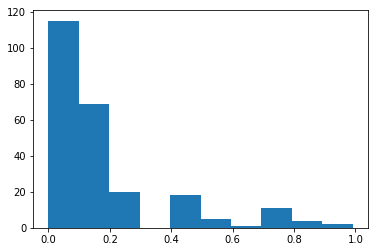

In [10]:
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [11]:
cleanNumericColumn(df, params.lowPercentColumns, createFlag=False)
cleanNumericColumn(df, params.midPercentColumns, createFlag=True)

(array([235.,   0.,   1.,   0.,   4.,   4.,   0.,  11.,   4.,   2.]),
 array([0.        , 0.0991247 , 0.1982494 , 0.2973741 , 0.3964988 ,
        0.4956235 , 0.5947482 , 0.6938729 , 0.7929976 , 0.89212229,
        0.99124699]),
 <a list of 10 Patch objects>)

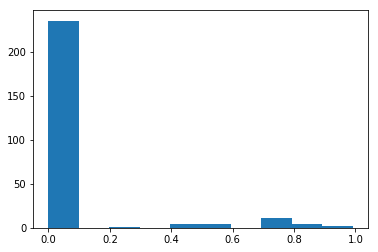

In [12]:
#df.drop(params.highPercentColumns
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [13]:
for column, highlyOccuring in params.categoricalOptions.items():
    #print(column, highlyOccuring)
    cleanOptions(df, column, highlyOccuring)

(array([235.,   0.,   1.,   0.,   4.,   4.,   0.,  11.,   4.,   2.]),
 array([0.        , 0.0991247 , 0.1982494 , 0.2973741 , 0.3964988 ,
        0.4956235 , 0.5947482 , 0.6938729 , 0.7929976 , 0.89212229,
        0.99124699]),
 <a list of 10 Patch objects>)

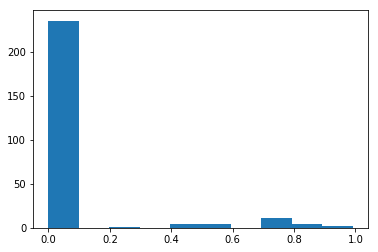

In [14]:
#df.drop(params.highPercentColumns
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [25]:
df_new = pd.get_dummies(df, columns=params.categoricalColumns)

(array([  0.,   0.,   0.,   0.,   0., 329.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

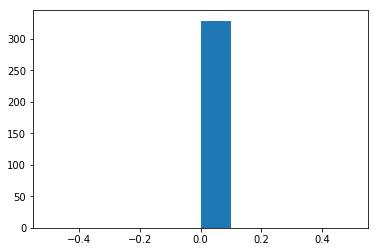

In [26]:
#df.drop(params.highPercentColumns
percentNa = df_new.isna().sum()/ len(df_new)
plt.hist(percentNa)

In [15]:
df.columns[df.isna().sum() > 0]

Index(['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [22]:
df['M1'].isna().sum()/len(df)

0.4590713584177194

In [24]:
df['M1'].dtypes

True

In [18]:
a = set(params.categoricalColumns)

In [19]:
b = set(params.categoricalOptions.keys())

In [24]:
'M1' in a

True